# **Introduction**
> Heart disease is very dangerous for people of any age. Lot's of people are dying every year due to heart diseases. If someone with heart disease follow proper rules and ragulation he might live ok. So the important part is to determine if someone has heart disease or not. 



## Uploading Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart Disease Dataset (1).csv to Heart Disease Dataset (1).csv


# **Understanding the problem**
A dataset was given which has 14 columns containing different information about a person. We need to predict the target column using other 13 columns. This is a supervised classification problem.

## Import pandas Labrary and showing and read dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Heart Disease Dataset (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()#view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Age visualization

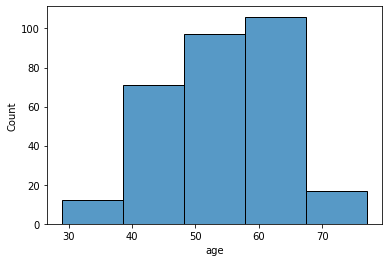

In [ ]:
import seaborn as sns
sns.histplot(data=df, x = 'age', bins=5)

## Target vs age visualization

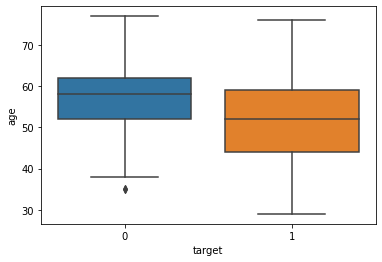

In [ ]:
sns.boxplot(x='target',y='age',data=df)

## Checking outlier some columns and using Boxplot

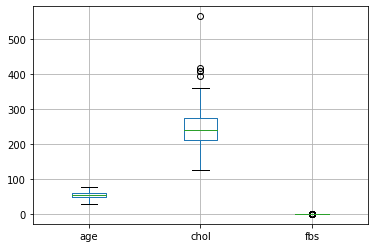

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
df.boxplot(['age','chol','fbs'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


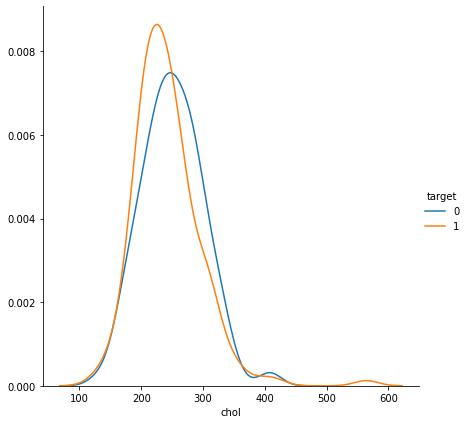

In [ ]:
sns.FacetGrid(df, hue="target", size=6).map(sns.kdeplot,"chol").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


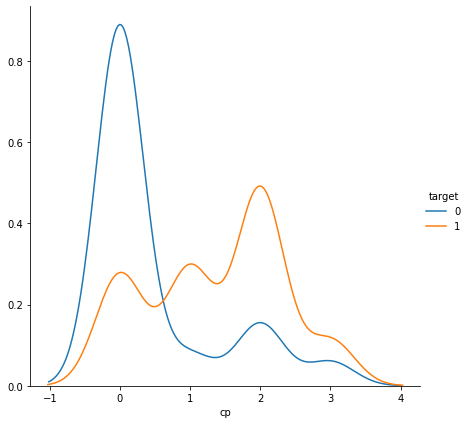

In [ ]:
sns.FacetGrid(df, hue="target", size=6).map(sns.kdeplot,"cp").add_legend()

## showing specific column correlation

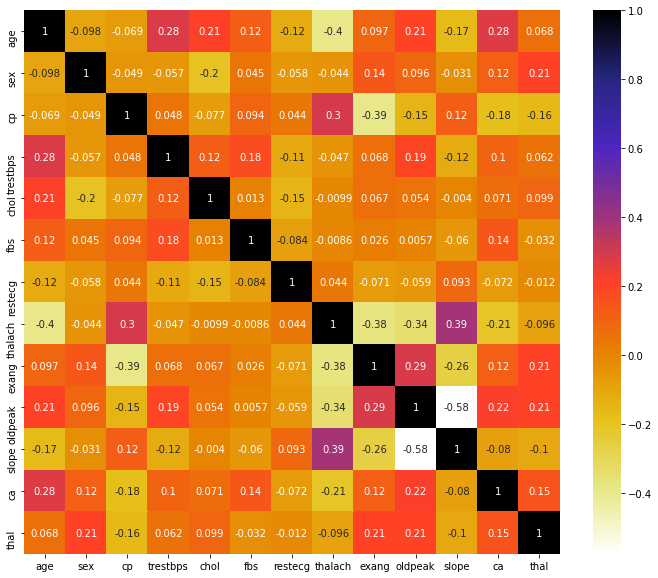

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
corr= df[['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope'	,'ca',	'thal']].corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
correlated_columns = correlation(df[['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope'	,'ca',	'thal']],0.7)
correlated_columns

set()

## Feature Selection for Training and testing:

In [ ]:
feature_cols=['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope'	,'ca',	'thal']
X = df[feature_cols]
y= df['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC #SVM classifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2


## This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 240 to 8
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null     int64  
 2   cp        61 non-null     int64  
 3   trestbps  61 non-null     int64  
 4   chol      61 non-null     int64  
 5   fbs       61 non-null     int64  
 6   restecg   61 non-null     int64  
 7   thalach   61 non-null     int64  
 8   exang     61 non-null     int64  
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     int64  
 11  ca        61 non-null     int64  
 12  thal      61 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 6.7 KB


In [ ]:
from sklearn import preprocessing
X_train_new = preprocessing.scale(X_train)#Train Data preprocessing
X_test_new = preprocessing.scale(X_test)#Test Data preprocessing


svm = SVC(kernel = "linear")#SVM classifier of used linear kernel
svm.fit(X_train_new, y_train)#svm model fit
y_pred = svm.predict(X_test_new)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

## The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset.

In [ ]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10,random_state=31)
model = SVC(kernel="linear")#SVM classifier of used linear kernel
results = model_selection.cross_val_score(model,X_train_new,y_train,cv=kfold)
results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.88      , 0.84      , 0.70833333, 0.875     , 0.75      ,
       0.875     , 0.95833333, 0.95833333, 0.875     , 0.70833333])

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))# SVM model accuracy 

Accuracy:  0.819672131147541


In [ ]:
from sklearn.metrics import classification_report#Imported classification labrary
print(classification_report(y_test,y_pred))#svm model classification_report

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.88      0.81      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



In [ ]:
from sklearn.metrics import confusion_matrix #Imported confusion_matrix labrary
print(confusion_matrix(y_test,y_pred)) #SVM confusion_matrix

[[20  4]
 [ 7 30]]


#Random forest classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier #random forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_new,y_train)#model fit
y_pred =rf.predict(X_test_new)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))#random forest accuracy

Accuracy:  0.8032786885245902


In [ ]:
from sklearn.metrics import classification_report #Imported confusion_matrix labrary
print(classification_report(y_test,y_pred)) #random forest classification_report

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.86      0.81      0.83        37

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



## DecisionTreeClassifier model and Library import

In [ ]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()# Decision Tree Classifier
tree.fit(X_train_new,y_train)#Decision Tree Classifier model fit
y_pred = tree.predict(X_test_new)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))#Decision Tree Classifier Accuracy

Accuracy:  0.639344262295082


In [ ]:
from sklearn.metrics import classification_report #Imported classification_report labrary
                                            
print(classification_report(y_test,y_pred))##Decision Tree Classifier classification_report

              precision    recall  f1-score   support

           0       0.53      0.71      0.61        24
           1       0.76      0.59      0.67        37

    accuracy                           0.64        61
   macro avg       0.64      0.65      0.64        61
weighted avg       0.67      0.64      0.64        61



## Gaussian Naive Bayes and import labrary

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()#Naive Bayes Classifier
gnb.fit( X_train_new, y_train )##Naive Bayes Classifier model fit
y_pred = gnb.predict(X_test_new)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))#Naive Bayes Classifier Accuracy

Accuracy:  0.8360655737704918


In [ ]:
from sklearn.metrics import classification_report #Imported classification_report labrary
print(classification_report(y_test,y_pred))#Naive Bayes Classifier classification_report

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.86      0.86      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



## Naive Bayes Classifier by new predict patient

In [ ]:
gnb.predict([[35,0,2,115,245,0,0,147,0,0.4,2,0,2]]) #new predict patient

array([1])